# CNN Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'TCEHY'

tencent_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(tencent_data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2013-01-02  6.674  6.730  6.672  6.720   6.169182  362500
2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
2013-01-07  6.590  6.600  6.556  6.600   6.059017   83000
2013-01-08  6.592  6.592  6.540  6.570   6.031477   49000


In [ ]:
tencent_data.reset_index(inplace=True)

print(tencent_data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2013-01-02  6.674  6.730  6.672  6.720   6.169182  362500
1 2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2 2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
3 2013-01-07  6.590  6.600  6.556  6.600   6.059017   83000
4 2013-01-08  6.592  6.592  6.540  6.570   6.031477   49000


In [ ]:

tencent_data['Date'] = pd.to_datetime(tencent_data['Date'])
tencent_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500
1,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000
2,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000
3,2013-01-07,6.590000,6.600000,6.556000,6.600000,6.059017,83000
4,2013-01-08,6.592000,6.592000,6.540000,6.570000,6.031477,49000
...,...,...,...,...,...,...,...
2513,2022-12-23,40.689999,40.880001,40.049999,40.259998,37.953487,1836800
2514,2022-12-27,40.130001,42.169998,40.000000,41.830002,39.433548,4433500
2515,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400
2516,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
tencent_merged = pd.merge(date_range_df, tencent_data, on='Date', how='left')
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    tencent_merged[metric].interpolate(method='linear', inplace=True)

tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0


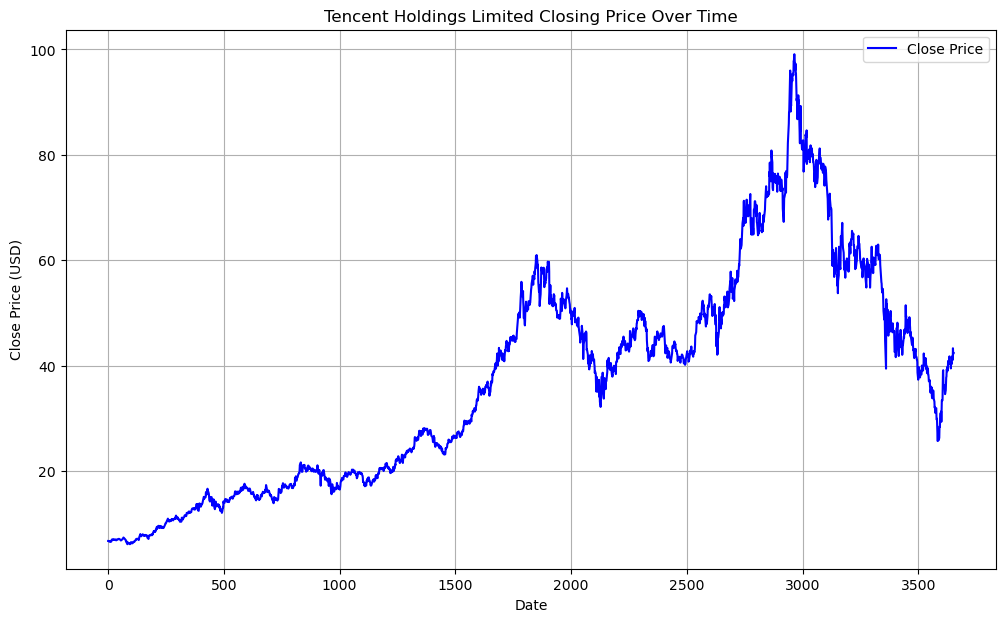

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(tencent_merged['Close'], label='Close Price', color='blue')
plt.title('Tencent Holdings Limited Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = tencent_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))
# Flatten the convolution output to feed it into a dense layer
model.add(Flatten())
# Output layer
model.add(Dense(units=1))   # Assuming a regression problem

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])

# Print the model summary to review its architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 1s - 26ms/step - loss: 0.0545 - mean_absolute_error: 0.1455 - val_loss: 0.0013 - val_mean_absolute_error: 0.0304
Epoch 2/50
47/47 - 0s - 2ms/step - loss: 4.9890e-04 - mean_absolute_error: 0.0165 - val_loss: 5.8317e-04 - val_mean_absolute_error: 0.0197
Epoch 3/50
47/47 - 0s - 2ms/step - loss: 1.6651e-04 - mean_absolute_error: 0.0085 - val_loss: 5.8446e-04 - val_mean_absolute_error: 0.0199
Epoch 4/50
47/47 - 0s - 2ms/step - loss: 1.6514e-04 - mean_absolute_error: 0.0083 - val_loss: 5.7730e-04 - val_mean_absolute_error: 0.0198
Epoch 5/50
47/47 - 0s - 3ms/step - loss: 1.8648e-04 - mean_absolute_error: 0.0084 - val_loss: 5.6724e-04 - val_mean_absolute_error: 0.0196
Epoch 6/50
47/47 - 0s - 3ms/step - loss: 1.6628e-04 - mean_absolute_error: 0.0085 - val_loss: 6.3488e-04 - val_mean_absolute_error: 0.0210
Epoch 7/50
47/47 - 0s - 2ms/step - loss: 1.6211e-04 - mean_absolute_error: 0.0084 - val_loss: 5.7918e-04 - val_mean_absolute_error: 0.0199
Epoch 8/50
47/47 - 0s - 2ms/step -

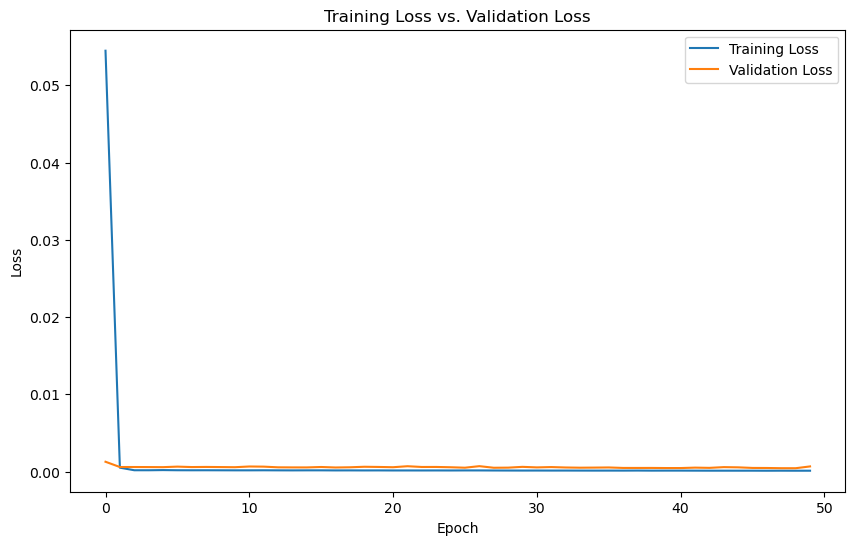

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Train RMSE: 1.2542803677595824
Train MAE: 0.8073577933711978
Train MAPE: 2.1727107054846413
Test RMSE: 1.8831044367947498
Test MAE: 1.4350405148719545
Test MAPE: 3.354329191482957


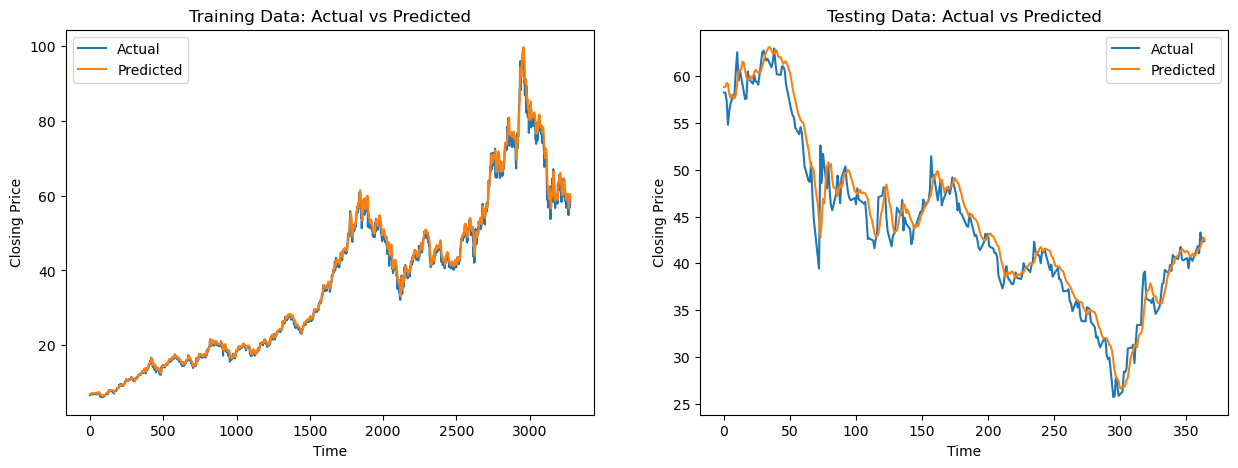

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

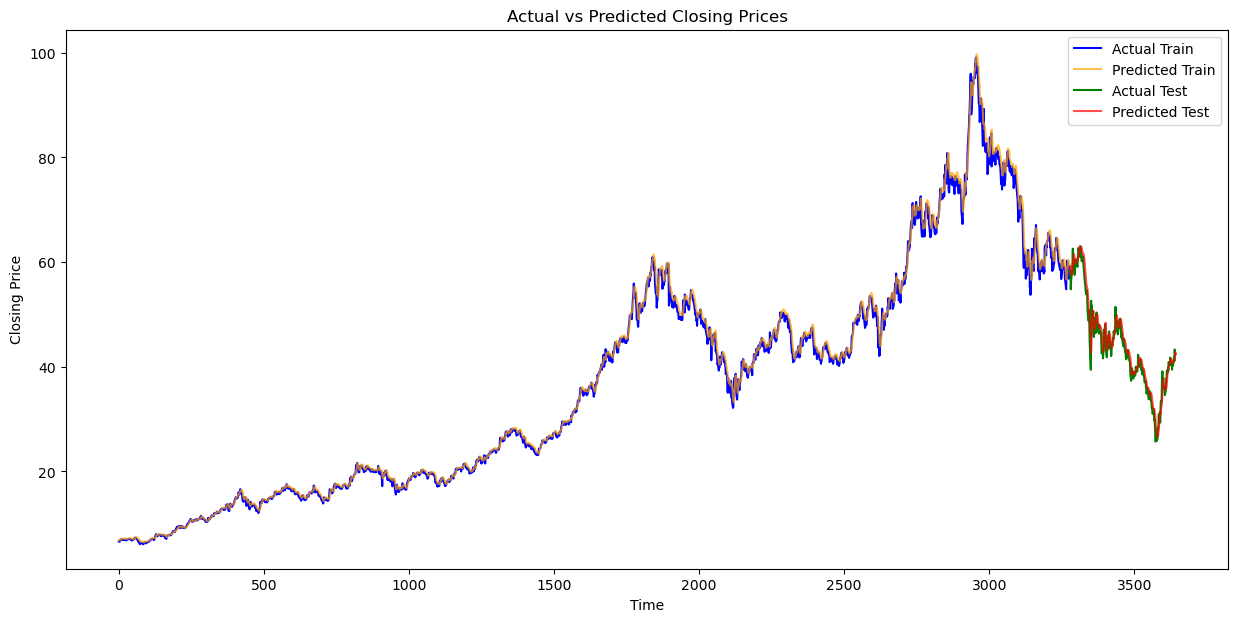

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'TCEHY'

tencent_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(tencent_data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2013-01-02  6.674  6.730  6.672  6.720   6.169182  362500
2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
2013-01-07  6.590  6.600  6.556  6.600   6.059017   83000
2013-01-08  6.592  6.592  6.540  6.570   6.031477   49000


In [ ]:
tencent_data.reset_index(inplace=True)

print(tencent_data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2013-01-02  6.674  6.730  6.672  6.720   6.169182  362500
1 2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2 2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
3 2013-01-07  6.590  6.600  6.556  6.600   6.059017   83000
4 2013-01-08  6.592  6.592  6.540  6.570   6.031477   49000


In [ ]:

tencent_data['Date'] = pd.to_datetime(tencent_data['Date'])
tencent_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500
1,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000
2,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000
3,2013-01-07,6.590000,6.600000,6.556000,6.600000,6.059017,83000
4,2013-01-08,6.592000,6.592000,6.540000,6.570000,6.031477,49000
...,...,...,...,...,...,...,...
2513,2022-12-23,40.689999,40.880001,40.049999,40.259998,37.953487,1836800
2514,2022-12-27,40.130001,42.169998,40.000000,41.830002,39.433548,4433500
2515,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400
2516,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
tencent_merged = pd.merge(date_range_df, tencent_data, on='Date', how='left')
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    tencent_merged[metric].interpolate(method='linear', inplace=True)

tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0


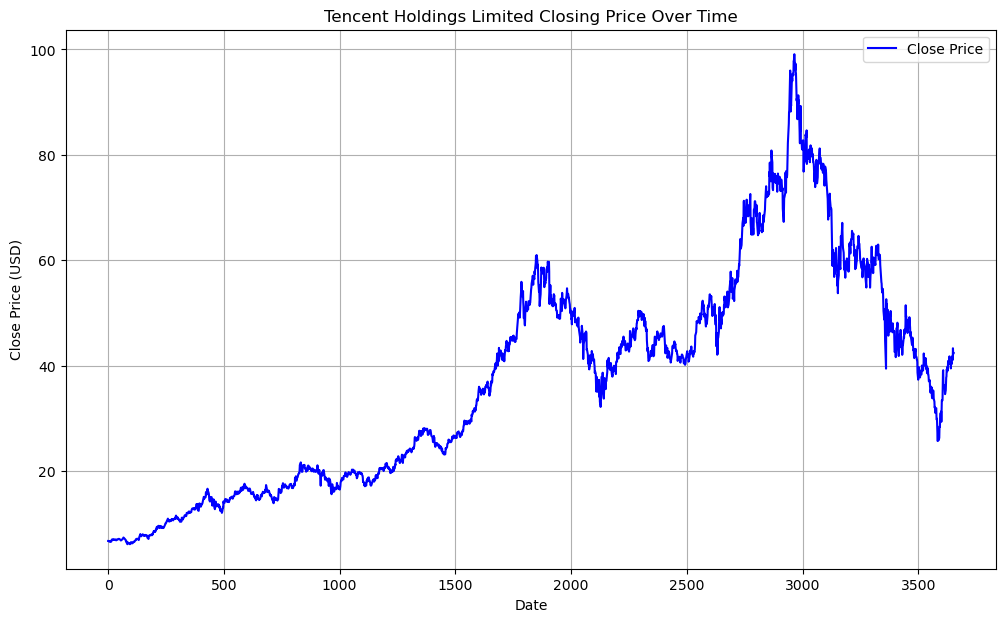

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(tencent_merged['Close'], label='Close Price', color='blue')
plt.title('Tencent Holdings Limited Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = tencent_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=64, activation='tanh', input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=False))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse' , metrics=['mean_absolute_error'])
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 54ms/step - loss: 0.0258 - mean_absolute_error: 0.1072 - val_loss: 8.2092e-04 - val_mean_absolute_error: 0.0233
Epoch 2/50
47/47 - 0s - 5ms/step - loss: 3.9765e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0014 - val_mean_absolute_error: 0.0320
Epoch 3/50
47/47 - 0s - 5ms/step - loss: 2.2498e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0015 - val_mean_absolute_error: 0.0329
Epoch 4/50
47/47 - 0s - 6ms/step - loss: 2.1029e-04 - mean_absolute_error: 0.0103 - val_loss: 9.3087e-04 - val_mean_absolute_error: 0.0258
Epoch 5/50
47/47 - 0s - 6ms/step - loss: 2.0695e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0011 - val_mean_absolute_error: 0.0278
Epoch 6/50
47/47 - 0s - 6ms/step - loss: 1.9196e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0010 - val_mean_absolute_error: 0.0271
Epoch 7/50
47/47 - 0s - 7ms/step - loss: 1.9405e-04 - mean_absolute_error: 0.0093 - val_loss: 7.4647e-04 - val_mean_absolute_error: 0.0230
Epoch 8/50
47/47 - 0s - 5ms/step - loss: 1.880

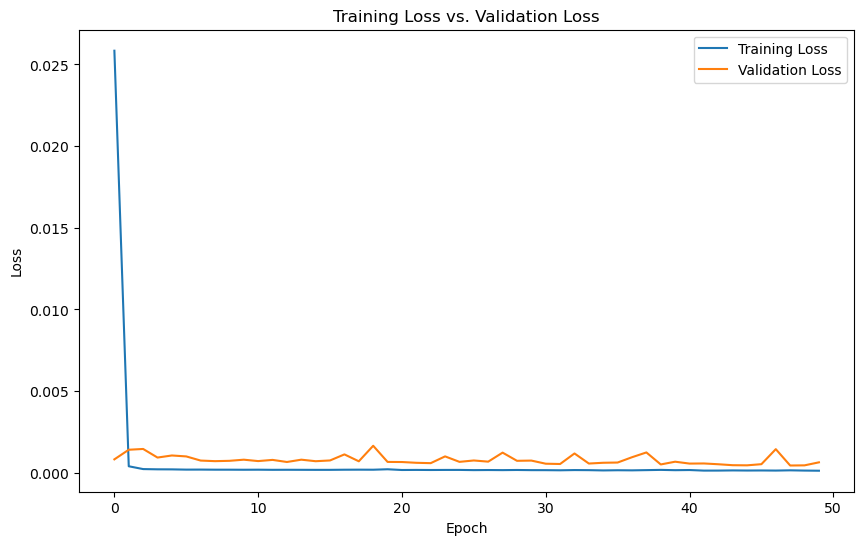

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 1.2469486054720813
Train MAE: 0.7873196317239435
Train MAPE: 2.055097538120086
Test RMSE: 1.9111697793302138
Test MAE: 1.4446286397437527
Test MAPE: 3.381526205443597


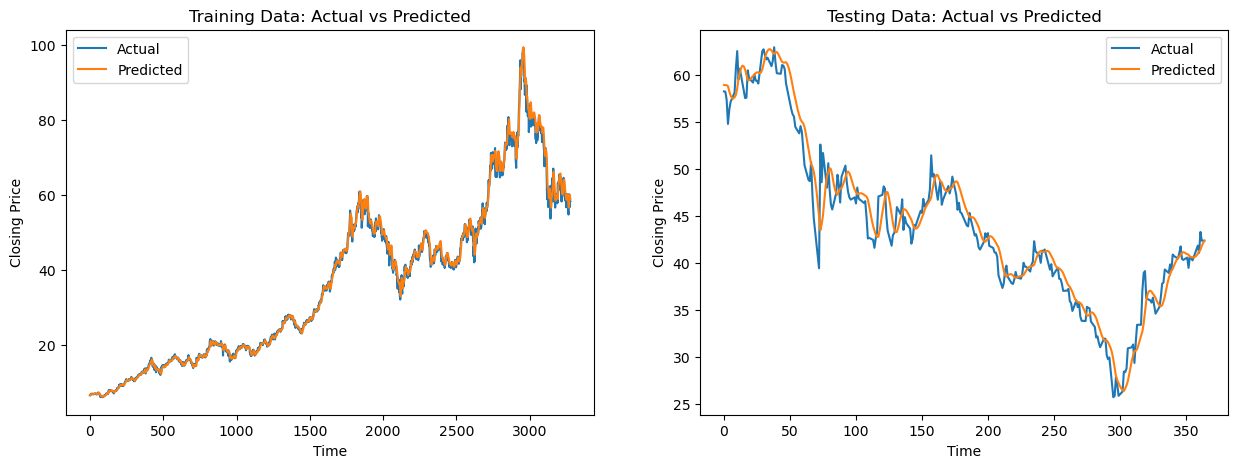

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

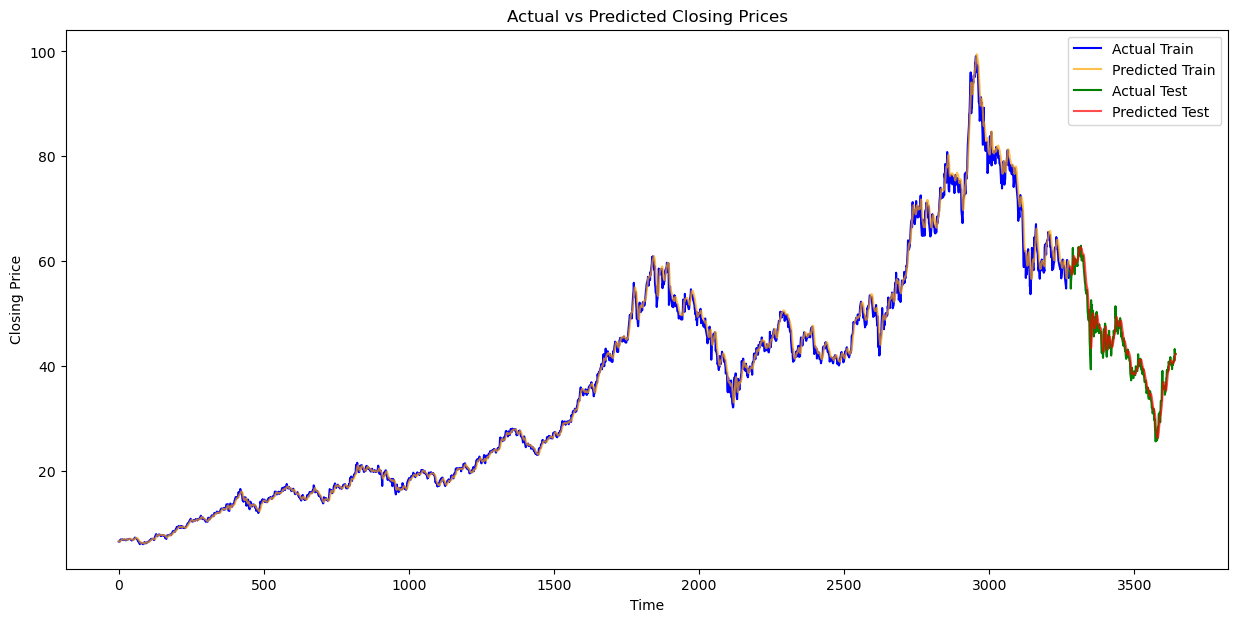

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# CNN-LSTM Model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import yfinance as yf

ticker_symbol = 'TCEHY'

tencent_data = yf.download(ticker_symbol, start='2013-01-01', end='2023-01-01')

print(tencent_data.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2013-01-02  6.674  6.730  6.672  6.720   6.169182  362500
2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
2013-01-07  6.590  6.600  6.556  6.600   6.059017   83000
2013-01-08  6.592  6.592  6.540  6.570   6.031477   49000


In [ ]:
tencent_data.reset_index(inplace=True)

print(tencent_data.head())

        Date   Open   High    Low  Close  Adj Close  Volume
0 2013-01-02  6.674  6.730  6.672  6.720   6.169182  362500
1 2013-01-03  6.734  6.734  6.660  6.660   6.114100  355000
2 2013-01-04  6.658  6.742  6.652  6.694   6.145313  101000
3 2013-01-07  6.590  6.600  6.556  6.600   6.059017   83000
4 2013-01-08  6.592  6.592  6.540  6.570   6.031477   49000


In [ ]:

tencent_data['Date'] = pd.to_datetime(tencent_data['Date'])
tencent_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500
1,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000
2,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000
3,2013-01-07,6.590000,6.600000,6.556000,6.600000,6.059017,83000
4,2013-01-08,6.592000,6.592000,6.540000,6.570000,6.031477,49000
...,...,...,...,...,...,...,...
2513,2022-12-23,40.689999,40.880001,40.049999,40.259998,37.953487,1836800
2514,2022-12-27,40.130001,42.169998,40.000000,41.830002,39.433548,4433500
2515,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400
2516,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700


In [ ]:
date_range_start = '2013-01-01'
date_range_end = '2023-01-01'
full_date_range = pd.date_range(start=date_range_start, end=date_range_end)
date_range_df = pd.DataFrame(full_date_range, columns=['Date'])
tencent_merged = pd.merge(date_range_df, tencent_data, on='Date', how='left')
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
financial_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for metric in financial_metrics:
    tencent_merged[metric].interpolate(method='linear', inplace=True)

tencent_merged.bfill(inplace=True)
tencent_merged

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
1,2013-01-02,6.674000,6.730000,6.672000,6.720000,6.169182,362500.0
2,2013-01-03,6.734000,6.734000,6.660000,6.660000,6.114100,355000.0
3,2013-01-04,6.658000,6.742000,6.652000,6.694000,6.145313,101000.0
4,2013-01-05,6.635333,6.694667,6.620000,6.662666,6.116548,95000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,41.779999,42.349998,40.770000,41.070000,38.717083,5272400.0
3649,2022-12-29,43.070000,43.619999,42.759998,43.290001,40.809902,4546700.0
3650,2022-12-30,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0
3651,2022-12-31,42.040001,42.919998,42.040001,42.360001,39.933182,1505500.0


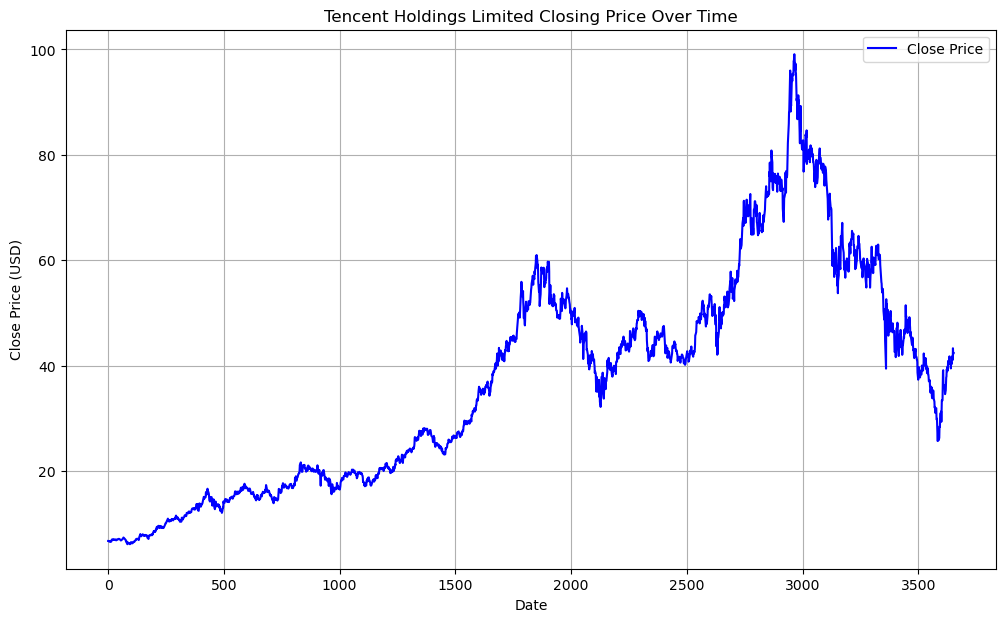

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(tencent_merged['Close'], label='Close Price', color='blue')
plt.title('Tencent Holdings Limited Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = tencent_merged[['Close']].values

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)

def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 10
X, y = create_sequences(data_scaled, sequence_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3278, 10, 1)
(365, 10, 1)
(3278, 1)
(365, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Bidirectional, TimeDistributed, Flatten

model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]), padding='same'))
model.add(MaxPooling1D(pool_size=1, padding='same'))

# model.add((Flatten()))

# model.add(BatchNormalization())
# model.add(MaxPooling1D(pool_size=1, padding='same'))
model.add(LSTM(units=64, return_sequences=False, activation='tanh'))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])

# Model summary to see the architecture
model.summary()

C:\Users\Timch\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,025 (97.75 KB)

 Trainable params: 25,025 (97.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=2, validation_split=0.1)

Epoch 1/50
47/47 - 3s - 72ms/step - loss: 0.0151 - mean_absolute_error: 0.0806 - val_loss: 6.4524e-04 - val_mean_absolute_error: 0.0207
Epoch 2/50
47/47 - 0s - 6ms/step - loss: 2.1397e-04 - mean_absolute_error: 0.0107 - val_loss: 9.1209e-04 - val_mean_absolute_error: 0.0255
Epoch 3/50
47/47 - 0s - 7ms/step - loss: 1.6427e-04 - mean_absolute_error: 0.0089 - val_loss: 6.8350e-04 - val_mean_absolute_error: 0.0218
Epoch 4/50
47/47 - 0s - 7ms/step - loss: 1.5108e-04 - mean_absolute_error: 0.0084 - val_loss: 6.1258e-04 - val_mean_absolute_error: 0.0206
Epoch 5/50
47/47 - 0s - 7ms/step - loss: 1.4205e-04 - mean_absolute_error: 0.0080 - val_loss: 7.3515e-04 - val_mean_absolute_error: 0.0229
Epoch 6/50
47/47 - 0s - 6ms/step - loss: 1.4149e-04 - mean_absolute_error: 0.0079 - val_loss: 5.6832e-04 - val_mean_absolute_error: 0.0197
Epoch 7/50
47/47 - 0s - 6ms/step - loss: 1.4248e-04 - mean_absolute_error: 0.0080 - val_loss: 6.6699e-04 - val_mean_absolute_error: 0.0217
Epoch 8/50
47/47 - 0s - 6ms/st

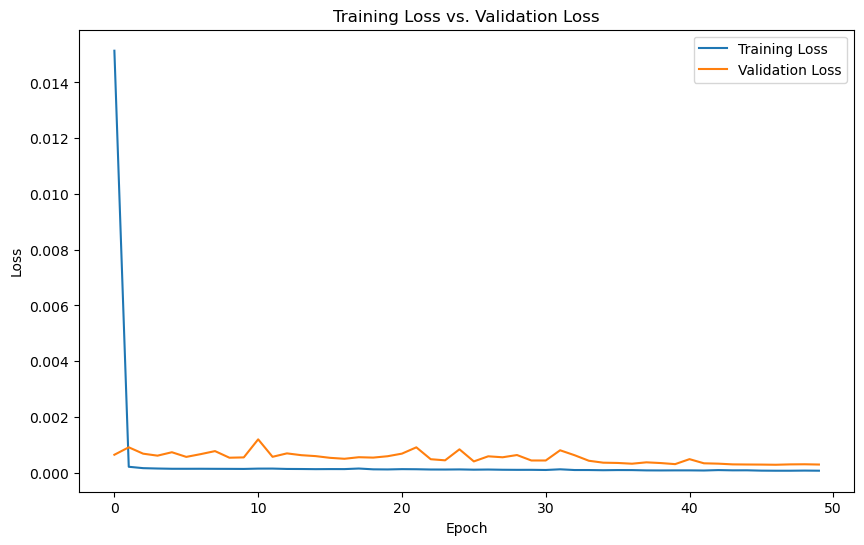

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred_actual = scaler.inverse_transform(train_pred)
train_actual = scaler.inverse_transform(y_train)
test_pred_actual = scaler.inverse_transform(test_pred)
test_actual = scaler.inverse_transform(y_test)

train_rmse = sqrt(mean_squared_error(train_actual, train_pred_actual))
train_mae = mean_absolute_error(train_actual, train_pred_actual)
train_mape = np.mean(np.abs((train_actual - train_pred_actual) / train_actual)) * 100

test_rmse = sqrt(mean_squared_error(test_actual, test_pred_actual))
test_mae = mean_absolute_error(test_actual, test_pred_actual)
test_mape = np.mean(np.abs((test_actual - test_pred_actual) / test_actual)) * 100

print('Train RMSE:', train_rmse)
print('Train MAE:', train_mae)
print('Train MAPE:', train_mape)
print('Test RMSE:', test_rmse)
print('Test MAE:', test_mae)
print('Test MAPE:', test_mape)

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train RMSE: 0.957414957078852
Train MAE: 0.614135203260655
Train MAPE: 1.6494551191650386
Test RMSE: 1.4556986367125193
Test MAE: 0.9987879173940719
Test MAPE: 2.3247530439832027


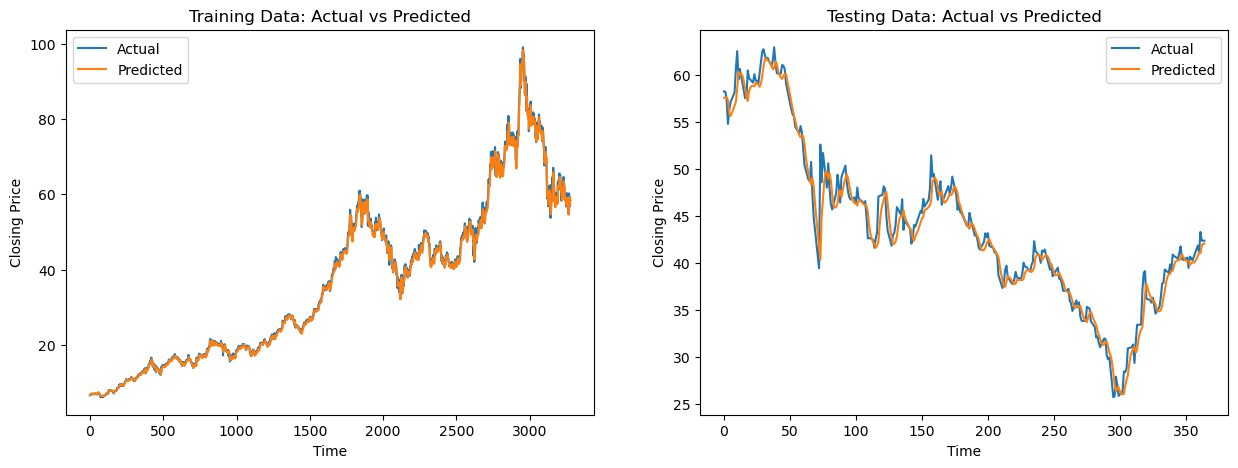

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(train_actual, label='Actual')
plt.plot(train_pred_actual, label='Predicted')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_actual, label='Actual')
plt.plot(test_pred_actual, label='Predicted')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()

plt.show()

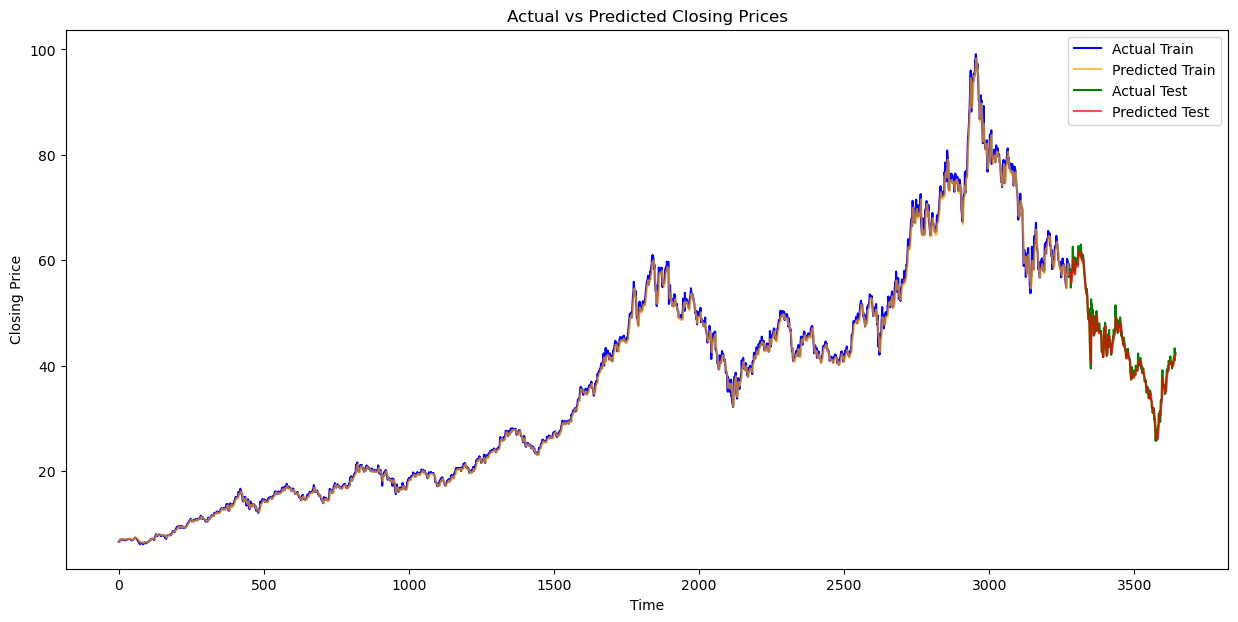

In [ ]:
import matplotlib.pyplot as plt

train_time = range(len(train_actual))
test_time = range(len(train_actual), len(train_actual) + len(test_actual))

plt.figure(figsize=(15, 7))
plt.plot(train_time, train_actual, label='Actual Train', color='blue')
plt.plot(train_time, train_pred_actual, label='Predicted Train', color='orange', alpha=0.7)
plt.plot(test_time, test_actual, label='Actual Test', color='green')
plt.plot(test_time, test_pred_actual, label='Predicted Test', color='red', alpha=0.7)

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()